# Componente Común del IPC: Una medida alternativa de inflación subyacente para Guatemala

Autor: Juan Manuel Jiménez Cruz  
Email: <juanmajc21@gmail.com>  
LinkedIn: [www.linkedin/juanmajc](https://www.linkedin.com/in/juanmajc/)  
Repositorio: 

## Importando librerías

In [1]:
import pandas as pd 
import numpy as np
import os

# Para graficar
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from unicodedata import decimal
import matplotlib.dates as mdates

import seaborn as sns
from pylab import rcParams
plt.style.use('seaborn')

## Manipulación base de datos del INE

### Recopilación del IPC

Creando un DataFrame con el histórico del IPC anual proporcionado por el INE [disponible aquí](https://www.ine.gob.gt/estadisticas/bases-de-datos/indice-de-precios-al-consumidor/).

In [2]:
df_tmp = pd.DataFrame() #Esta DataFrame servirá para operaciones intermedias a lo largo del código

Lista_IPC = os.listdir("../SRC/IPC-INE/Histórico/")
df_IPC_sucio = pd.DataFrame()

for excel_file in Lista_IPC:
    if excel_file.endswith(".xls"):
        df_tmp = pd.read_excel("../SRC/IPC-INE/Histórico/"+excel_file)
        df_IPC_sucio = pd.concat([df_IPC_sucio,df_tmp],axis=0)


# Visualizando el DataFrame sucio

df_IPC_sucio

,Año,Mes,Código,Descripción,Rep.,Reg. I,Reg. II,Reg. III,Reg. IV,Reg. V,...,Reg. VIII,República,Región I,Región II,Región III,Región IV,Región V,Región VI,Región VII,Región VIII
0,2010,Diciembre,0,INDICE GENERAL,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Diciembre,1,ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS ...,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Diciembre,111101,ARROZ ...,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Diciembre,111201,HARINA ...,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Diciembre,111202,MAÍZ ...,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2022,Junio,1251101,Servicio de emisión de certificado de todo tip...,119.54,119.54,119.54,119.54,119.54,119.54,...,119.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,2022,Junio,1251102,Servicio de fotocopiado ...,124.29,126.39,103.89,121.42,111.80,137.27,...,108.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,2022,Junio,1251103,Servicio notarial ...,114.58,124.59,106.99,104.61,107.75,114.70,...,113.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,2022,Junio,1251104,Servicio funerario ...,129.79,128.00,109.20,164.07,151.33,126.48,...,117.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adecuación para el IPC a nivel República
El dataframe tiene columnas repetidas por nomenclatura irregular

En nuestro caso solo nos interesan las columnas:

* (0)   Año
* (1)   Mes
* (2)   Código
* (3)   Descripción
* (4,13)   República

In [3]:
# Función para traducir los meses escritos como string a enteros del 1 al 12
def mes_a_numero(mes:str):
    if mes.lower() == "enero":
        return 1
    if mes.lower() == "febrero":
        return 2
    if mes.lower() == "marzo":
        return 3
    if mes.lower() == "abril":
        return 4
    if mes.lower() == "mayo":
        return 5
    if mes.lower() == "junio":
        return 6
    if mes.lower() == "julio":
        return 7
    if mes.lower() == "agosto":
        return 8
    if mes.lower() == "septiembre":
        return 9
    if mes.lower() == "octubre":
        return 10
    if mes.lower() == "noviembre":
        return 11
    if mes.lower() == "diciembre":
        return 12

In [4]:
df_IPC_sucio.columns[[0,1,2,3,4]]

Index(['Año', 'Mes', 'Código', 'Descripción', 'Rep.'], dtype='object')

In [5]:
Col_CODIGO = [2]
Col_Descripcion = [3]
Col_Republica = [4,13]

# Creando el DataFrame de IPC
df_IPC = df_IPC_sucio[df_IPC_sucio.columns[[0,1,2,3]].to_list()].copy()
df_IPC["República"] =  df_IPC_sucio[df_IPC_sucio.columns[[4,13]]].sum(axis=1,numeric_only=True)

df_IPC["Mes"]=df_IPC["Mes"].apply(lambda x: mes_a_numero(x))
df_IPC["Código"]=df_IPC["Código"].astype(int)

df_IPC

,Año,Mes,Código,Descripción,República
0,2010,12,0,INDICE GENERAL,100.00
1,2010,12,1,ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS ...,100.00
2,2010,12,111101,ARROZ ...,100.00
3,2010,12,111201,HARINA ...,100.00
4,2010,12,111202,MAÍZ ...,100.00
...,...,...,...,...,...
1747,2022,6,1251101,Servicio de emisión de certificado de todo tip...,119.54
1748,2022,6,1251102,Servicio de fotocopiado ...,124.29
1749,2022,6,1251103,Servicio notarial ...,114.58
1750,2022,6,1251104,Servicio funerario ...,129.79


En el siguiente DataFrame está identificado que división representa cada código.

In [6]:
df_Codigos = pd.read_excel("../SRC/IPC-INE/Codigos_descripción.xls")
df_Codigos = df_Codigos.set_index("Código")
df_Codigos

,Descripción
Código,
0,Índice general
1,Alimentos y bebidas no alcohólicas ...
111101,Arroz ...
111201,Harina ...
111202,Maíz ...
...,...
1251101,Servicio de emisión de certificado de todo tip...
1251102,Servicio de fotocopiado ...
1251103,Servicio notarial ...


## Crearemos la serie de tiempo
Debemos crear un DataFrame de fechas con las cuales trabajar, para esto usaremos de referencia a df_IPC.  
Con base en estas fechas crearemos un nuevo DataFrame df_IPC_ts que contendrá el nivel general de precios y los precios de las doce divisiones principales el IPC como series de tiempo.



In [7]:
df_fecha = pd.DataFrame()

# Obtiene cual es la fecha más antigua y más reciente del df_IPC y con ello hace un DataFrame con un listado con las fechas de los cierres de todos los meses del intervalo
fecha_antigua = str(df_IPC["Año"].min())+"-"+str(df_IPC[df_IPC["Año"]==df_IPC["Año"].min()]["Mes"].min())
fecha_reciente = str(df_IPC["Año"].max())+"-"+str(df_IPC[df_IPC["Año"]==df_IPC["Año"].max()]["Mes"].max())

df_fecha["Fecha"]=pd.date_range(start=fecha_antigua, end=fecha_reciente,freq="MS")+pd.offsets.MonthEnd(0)


df_IPC_ts = df_fecha.copy()

for Codigo in list(df_Codigos.index.values):   
        
    df_tmp = pd.DataFrame({str(Codigo):df_IPC[df_IPC["Código"]==Codigo]["República"].to_list()})
    df_IPC_ts = pd.concat([df_IPC_ts,df_tmp],axis=1)

df_IPC_ts = df_IPC_ts.set_index("Fecha")

# Seleccionando el nivel general de precios y las doce divisiones principales
filtrar = [str(i) for i in range(0,13)]
df_IPC_ts = df_IPC_ts[filtrar]
df_IPC_ts

,0,1,2,3,4,5,6,7,8,9,10,11,12
Fecha,,,,,,,,,,,,,
2010-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2011-01-31,100.76,100.89,100.47,100.14,101.65,100.20,100.20,101.45,100.01,100.59,100.55,100.41,100.33
2011-02-28,101.53,102.35,100.82,100.38,101.99,100.42,100.51,102.81,100.46,100.80,100.71,101.05,100.64
2011-03-31,102.41,103.45,101.07,100.59,103.10,100.74,100.82,105.69,100.46,101.25,100.77,101.39,100.90
2011-04-30,103.17,105.01,101.43,100.78,103.99,101.12,101.30,106.80,100.68,100.79,100.77,101.48,101.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,153.79,231.66,118.36,114.66,121.29,121.25,129.31,134.28,111.15,119.24,106.16,127.45,124.18
2022-03-31,156.09,235.42,119.07,114.85,123.61,122.58,129.69,139.65,111.01,119.93,106.17,129.22,125.07
2022-04-30,156.93,237.50,120.31,115.04,122.17,123.84,129.84,141.40,110.93,120.26,106.18,130.01,125.99


## Obteniendo la Inflación Interanual

In [8]:
#DataFrame con la Inflación Total
df_Inflacion = pd.DataFrame()

df_Inflacion = pd.DataFrame(df_IPC_ts.iloc[:,0].pct_change(periods=12)).iloc[12:]
df_Inflacion = df_Inflacion.rename(columns={"0":"Inflación Total"})

df_Inflacion.to_excel("../Output/Tablas/Inflación_Total.xlsx")
df_Inflacion

,Inflación Total
Fecha,
2011-12-31,0.062000
2012-01-31,0.054982
2012-02-29,0.052201
2012-03-31,0.046577
2012-04-30,0.042745
...,...
2022-02-28,0.029798
2022-03-31,0.041711
2022-04-30,0.046200


In [9]:
#DataFrame con las inflaciones de las doce divisiones del gasto del IPC
df_Inflacion_divisiones = df_IPC_ts.iloc[:,1:].pct_change(periods=12).iloc[12:]

df_Inflacion_divisiones.columns=["INF"+df_Inflacion_divisiones.columns[i] for i in range(len(df_Inflacion_divisiones.columns))]
df_Inflacion_divisiones.to_excel("../Output/Tablas/Inflación_Divisiones.xlsx")

df_Inflacion_divisiones.tail()

,INF1,INF2,INF3,INF4,INF5,INF6,INF7,INF8,INF9,INF10,INF11,INF12
Fecha,,,,,,,,,,,,
2022-02-28,0.031939,0.022725,0.012450,0.035605,0.046883,0.015550,0.057989,-0.004657,0.017493,0.000660,0.033574,0.014625
2022-03-31,0.049155,0.026200,0.014845,0.051016,0.055450,0.017017,0.073983,-0.007244,0.015323,0.000754,0.043106,0.020480
2022-04-30,0.056213,0.033858,0.016254,0.036569,0.063735,0.017714,0.088362,-0.007870,0.025497,0.000848,0.047707,0.027651
2022-05-31,0.072216,0.041945,0.020844,0.045235,0.068865,0.020277,0.115071,-0.009106,0.028988,0.000848,0.058185,0.031808
2022-06-30,0.106505,0.052456,0.023845,0.045355,0.077509,0.024802,0.114976,-0.000982,0.031274,0.000848,0.071532,0.038160


Por medio de la matriz de correlaciones se puede apreciar que existe correlación entre divisiones del gasto, lo que podría llevar a problemas de multicolinealidad si se hiciera un modelo empleandolas directamente

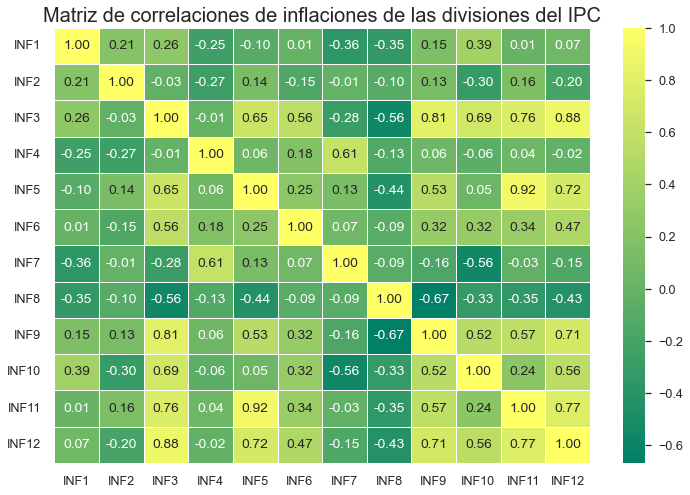

In [10]:
df_tmp = df_Inflacion_divisiones.copy()


plt.figure(figsize=(12, 8))
sns.set(font_scale=1.15)
sns.heatmap(df_tmp.corr(method="pearson"), annot=True, fmt=".2f", linewidths=.5,cmap="summer")#, cmap="gist_heat")
plt.title('Matriz de correlaciones de inflaciones de las divisiones del IPC', fontsize=20)
plt.yticks(rotation="horizontal")

df_tmp.corr().to_excel("../Output/Tablas/Matriz_Correlaciones_Inflación_Divisiones.xlsx")
plt.savefig("../Output/Gráficas/Matriz_Correlaciones_Inflación_Divisiones.jpg",bbox_inches='tight')
plt.show()

# Información publicada por el Banco de Guatemala

## Inflación subyacente publicada por el Banco de Guatemala
Creando un DataFrame con la Inflación Subyacente oficial [disponible aquí](https://www.banguat.gob.gt/es/page/inflacion-subyacente-interanual).

In [11]:
df_Excel_Subyacente_BANGUAT = pd.read_excel("../SRC/información Banguat/subyacente.xlsx",usecols="B:X",header=6,nrows=12)
df_Excel_Subyacente_BANGUAT

,Periodo,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Enero,7.373405,4.888726,5.268532,6.576911,6.373203,4.04,6.52,6.25,1.58,...,3.443551,3.161148,3.149876,3.211352,2.669239,2.944401,2.563517,2.69,3.29,5.24
1,Febrero,7.676759,4.576306,5.341478,6.303122,6.102400,4.32,6.75,5.42,1.97,...,3.227273,3.205636,3.199932,3.150322,2.621242,2.976097,2.412198,2.71,3.37,5.36
2,Marzo,7.693315,4.533352,5.472909,6.257268,5.980475,4.51,6.89,4.71,2.39,...,3.165129,3.120617,3.281197,3.127572,2.665603,2.891791,2.447869,2.79,3.47,5.08
3,Abril,7.731781,4.631392,5.324310,6.371430,5.910491,4.48,7.51,3.89,2.66,...,3.141078,3.150433,3.232375,3.073636,2.623186,2.983451,2.353829,2.84,3.71,4.99
4,Mayo,7.522233,4.803750,5.349647,6.514611,5.532934,4.28,8.39,3.18,2.57,...,3.044496,3.199301,3.311875,2.935148,2.628435,2.995731,2.275639,2.89,4.12,NaN
5,Junio,7.240798,4.878926,5.356986,6.681335,5.313145,4.30,9.09,2.30,2.42,...,2.931421,3.248563,3.230704,2.974342,2.602761,3.054911,2.131332,3.05,4.34,NaN
6,Julio,6.947857,4.812360,5.443810,6.866680,5.109561,4.46,9.43,1.65,2.42,...,2.985341,3.298039,3.209545,2.889938,2.626790,3.145478,2.033037,3.09,4.60,NaN
7,Agosto,6.380871,4.612450,5.618136,6.793070,4.959949,4.86,9.27,1.21,2.60,...,3.143980,3.238656,3.086730,2.766477,2.794933,3.096357,2.062010,3.18,4.85,NaN
8,Septiembre,6.130045,4.626726,5.892911,6.797319,4.561810,5.11,9.09,1.28,2.54,...,3.202498,3.146339,3.000084,2.855748,2.816010,2.954301,2.099836,3.30,4.92,NaN
9,Octubre,5.806330,4.679188,6.232500,7.090624,3.860106,5.29,9.12,0.86,2.81,...,3.239587,3.137931,3.042461,2.912070,2.861197,3.011494,2.209328,3.17,5.09,NaN


Es necesario transformar los datos para tener una serie de tiempo adecuada

In [12]:
#Obteniendo un listado con los años y el valor del último mes
Años = list(df_Excel_Subyacente_BANGUAT.columns.values)[1:]
Ultimo_Mes = df_Excel_Subyacente_BANGUAT[Años[-1]].dropna().index.values[-1]+1

# Creando un DataFrame de fecha nuevamente para construir la serie de tiempo del la Inflación Subyacente
fecha_antigua = str(Años[0])+"-1"
fecha_reciente = str(Años[-1])+"-"+str(Ultimo_Mes)

df_fecha=pd.DataFrame()
df_fecha["Fecha"]=pd.date_range(start=fecha_antigua, end=fecha_reciente,freq="MS")+pd.offsets.MonthEnd(0)
df_fecha = df_fecha.set_index("Fecha")

# Creando el DataFrame de Inflación Subyacente
df_Subyacente_BANGUAT = pd.DataFrame()

for i in range(Años[0],Años[-1]+1): 
    df_tmp = df_Excel_Subyacente_BANGUAT[i]
    df_Subyacente_BANGUAT = pd.concat([df_Subyacente_BANGUAT,df_tmp],axis=0)

df_Subyacente_BANGUAT = df_Subyacente_BANGUAT.dropna()
df_Subyacente_BANGUAT["Fecha"] = df_fecha.index
df_Subyacente_BANGUAT = df_Subyacente_BANGUAT.set_index("Fecha")
df_Subyacente_BANGUAT=df_Subyacente_BANGUAT.rename(columns={0:"Inflación Subyacente publicada por el Banco de Guatemala"})
df_Subyacente_BANGUAT = df_Subyacente_BANGUAT/100

df_Subyacente_BANGUAT.to_excel("../Output/Tablas/Inflación_Subyacente_BANGUAT.xlsx")
df_Subyacente_BANGUAT

,Inflación Subyacente publicada por el Banco de Guatemala
Fecha,
2002-01-31,0.073734
2002-02-28,0.076768
2002-03-31,0.076933
2002-04-30,0.077318
2002-05-31,0.075222
...,...
2022-12-31,0.050400
2023-01-31,0.052400
2023-02-28,0.053600


# Haciendo Análisis de Componentes Principales (PCA)

In [13]:
# Librerías necesarias
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures

## Paso 1: Estandarización de las variables y obtención de matriz de covarianzas

In [14]:
df_Inflacion_divisiones

,INF1,INF2,INF3,INF4,INF5,INF6,INF7,INF8,INF9,INF10,INF11,INF12
Fecha,,,,,,,,,,,,
2011-12-31,0.120800,0.049700,0.029900,0.058400,0.030100,0.033700,0.059700,0.008300,0.021600,0.009100,0.046400,0.027900
2012-01-31,0.109228,0.045785,0.031756,0.043384,0.031337,0.033234,0.042287,0.008399,0.018988,0.007658,0.046211,0.027310
2012-02-29,0.100244,0.043543,0.031082,0.039906,0.033459,0.035519,0.046299,0.003882,0.020040,0.006156,0.043642,0.027723
2012-03-31,0.095698,0.044227,0.031912,0.017362,0.034147,0.035806,0.032548,0.003285,0.016494,0.005656,0.042312,0.029534
2012-04-30,0.085897,0.042492,0.032248,-0.000288,0.036096,0.032379,0.034925,0.000000,0.031352,0.005656,0.045034,0.030599
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.031939,0.022725,0.012450,0.035605,0.046883,0.015550,0.057989,-0.004657,0.017493,0.000660,0.033574,0.014625
2022-03-31,0.049155,0.026200,0.014845,0.051016,0.055450,0.017017,0.073983,-0.007244,0.015323,0.000754,0.043106,0.020480
2022-04-30,0.056213,0.033858,0.016254,0.036569,0.063735,0.017714,0.088362,-0.007870,0.025497,0.000848,0.047707,0.027651


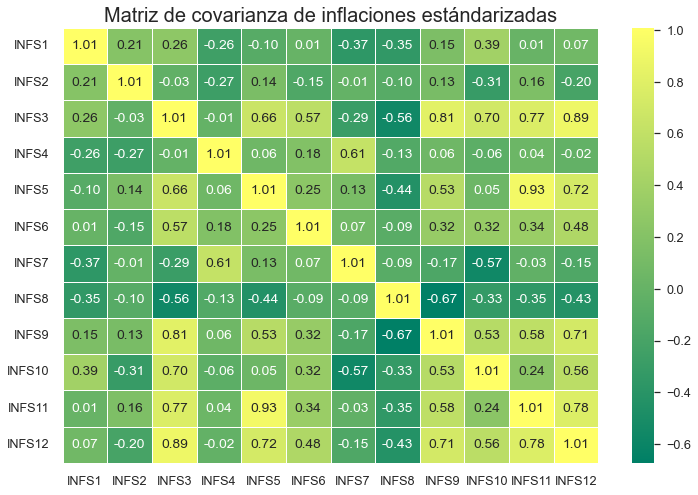

In [15]:
# Estandarizando
Inflaciones_Estandarizadas = StandardScaler().fit_transform(df_Inflacion_divisiones)
df_Inflaciones_Estandarizadas = pd.DataFrame(Inflaciones_Estandarizadas, columns = ["INFS"+str(i+1) for i in range(12)])
df_Inflaciones_Estandarizadas["Fecha"]=df_Inflacion_divisiones.index
df_Inflaciones_Estandarizadas = df_Inflaciones_Estandarizadas.set_index("Fecha")

Inflaciones_Estandarizadas=np.transpose(Inflaciones_Estandarizadas)

cov=np.cov(Inflaciones_Estandarizadas)

df_cov = pd.DataFrame(cov)
df_cov.columns=["INFS"+str(df_cov.columns[i]+1) for i in range(len(df_cov.columns))]
df_cov.index=df_cov.columns


plt.figure(figsize=(12, 8))
sns.set(font_scale=1.15)
sns.heatmap(df_cov, annot=True, fmt=".2f", linewidths=.5,cmap="summer")
plt.title('Matriz de covarianza de inflaciones estándarizadas', fontsize=20)
plt.xticks(rotation="horizontal")

df_cov.to_excel("../Output/Tablas/Matriz_Covarianzas_Inflaciones_Estandarizadas.xlsx")
plt.savefig("../Output/Gráficas/Matriz_Covarianzas_Inflaciones_Estandarizadas.jpg",bbox_inches='tight')

plt.show()

In [16]:
df_Inflaciones_Estandarizadas

,INFS1,INFS2,INFS3,INFS4,INFS5,INFS6,INFS7,INFS8,INFS9,INFS10,INFS11,INFS12
Fecha,,,,,,,,,,,,
2011-12-31,1.695014,1.884225,1.663713,1.272761,0.889981,2.419493,0.514708,-0.085288,0.494638,1.123670,2.068521,0.673774
2012-01-31,1.248031,1.679284,1.831129,0.829890,0.972314,2.314620,0.243931,-0.080639,0.274490,0.731393,2.053034,0.626600
2012-02-29,0.901032,1.561933,1.770349,0.727303,1.113523,2.828415,0.306321,-0.292420,0.363130,0.322939,1.843062,0.659591
2012-03-31,0.725445,1.597728,1.845220,0.062397,1.159292,2.893060,0.092491,-0.320422,0.064277,0.186974,1.734356,0.804411
2012-04-30,0.346842,1.506940,1.875603,-0.458174,1.288941,2.122517,0.129455,-0.474435,1.316588,0.186974,1.956823,0.889544
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,-1.737309,0.472229,0.089319,0.600440,2.006739,-1.661030,0.488106,-0.692760,0.148486,-1.172180,1.020115,-0.387397
2022-03-31,-1.072311,0.654119,0.305371,1.054983,2.576808,-1.331260,0.736810,-0.814062,-0.034370,-1.146540,1.799288,0.080602
2022-04-30,-0.799719,1.054947,0.432542,0.628881,3.128060,-1.174459,0.960407,-0.843445,0.823063,-1.120900,2.175381,0.653861


## Paso 2: Obtener Valores y Vectores Propios

In [17]:
autovalores, autovectores = np.linalg.eig(cov)

list_autovectores=["("+", ".join([str(i) for i in list(np.round(autovectores[j],2))])+")" for j in range(len(autovectores))]

df_autovectores = pd.DataFrame(list_autovectores,columns=["Vector propio"])
df_autovalores =pd.DataFrame(np.round(autovalores,2),columns=["Valor propio"])

df_Vectores_y_Valores_Propios = pd.concat([df_autovalores,df_autovectores],axis=1)

df_Vectores_y_Valores_Propios.to_excel("../Output/Tablas/Vectores_y_Valores_Propios.xlsx")
df_Vectores_y_Valores_Propios

,Valor propio,Vector propio
0,4.91,"(0.11, 0.43, 0.12, 0.45, 0.28, -0.61, 0.12, 0...."
1,2.19,"(-0.0, 0.07, 0.69, 0.08, 0.41, 0.36, 0.26, 0.0..."
2,1.58,"(0.44, 0.05, -0.06, -0.02, 0.08, 0.04, 0.04, -..."
3,1.19,"(0.01, -0.47, -0.3, 0.4, 0.03, 0.04, 0.64, -0...."
4,0.79,"(0.34, -0.28, 0.29, -0.22, -0.16, -0.27, 0.03,..."
5,0.54,"(0.23, -0.13, -0.31, -0.12, 0.79, 0.07, -0.29,..."
6,0.43,"(-0.1, -0.58, 0.04, 0.28, 0.12, -0.16, -0.26, ..."
7,0.19,"(-0.28, 0.03, -0.15, -0.58, 0.25, -0.03, 0.42,..."
8,0.15,"(0.38, 0.01, 0.06, 0.19, -0.1, 0.55, -0.04, 0...."
9,0.06,"(0.29, 0.34, -0.38, 0.1, -0.07, 0.12, 0.25, 0...."


# Paso 3: Obteniendo componentes principales
Con la proyección de las doce variables de las divisiones del gasto sobre los autovectores

In [18]:
np_PC=np.array([[np.dot(autovectores[:,i],df_Inflaciones_Estandarizadas.values[j,:]) for j in range(df_Inflaciones_Estandarizadas.shape[0])] for i in range(df_Inflaciones_Estandarizadas.shape[1])])

df_PC = pd.DataFrame(np.transpose(np_PC))
df_PC.columns=["PC"+str(i+1) for i in range(df_PC.shape[1])]
df_PC["Fecha"]=df_Inflaciones_Estandarizadas.index
df_PC.set_index("Fecha",inplace=True)

df_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Fecha,,,,,,,,,,,,
2011-12-31,3.306031,-0.559835,0.528302,0.632018,2.982461,-0.595839,1.548862,-0.054917,0.573812,-0.203366,0.143730,0.065795
2012-01-31,3.136686,-0.528449,0.639771,0.080469,2.702101,-0.551661,1.182217,-0.347195,0.468928,-0.099790,0.271129,-0.212100
2012-02-29,3.144370,-0.891411,0.579724,-0.051135,2.903376,-0.350212,0.615598,-0.584068,0.212650,0.025384,0.201043,-0.151345
2012-03-31,3.080041,-0.581409,0.761432,-0.526239,2.891992,-0.400525,0.133550,-0.711899,0.358063,0.212538,0.225573,-0.229210
2012-04-30,3.553966,-0.502069,1.233707,-0.587433,1.937234,0.312775,-0.109647,-0.167838,0.043453,-0.379498,0.249108,-0.259538
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.233145,-2.204556,1.884686,-0.499520,-1.912087,0.290450,0.478203,-0.867704,0.000195,-0.076165,-0.326190,-0.387927
2022-03-31,1.099868,-2.623537,2.132811,-0.364817,-1.502132,-0.538095,0.905621,-0.845674,0.038627,0.028999,-0.255648,-0.194497
2022-04-30,2.102330,-2.667315,2.754494,-0.488122,-1.365858,-0.439663,0.686207,-0.243314,-0.130266,-0.174924,-0.478905,0.029594


In [19]:
varianza_explicada=(np.var(df_PC)/np.sum(np.var(df_PC)))
varianza_explicada

PC1     0.406060
PC2     0.181303
PC3     0.130719
PC4     0.098417
PC5     0.065359
PC6     0.044509
PC7     0.035533
PC8     0.015548
PC9     0.012351
PC10    0.005016
PC11    0.002971
PC12    0.002214
dtype: float64

## Paso 3: Una forma más simple con Sklearn

In [20]:
# Empleando librerías de sklearn para hacer PCA
pca = decomposition.PCA(n_components=12)
pc = pca.fit_transform(np.transpose(Inflaciones_Estandarizadas))

# Creando DataFrame con la proporción de la varianza explicada por cada uno de los componentes principales obtenidos
df_pca = pd.DataFrame({"Componente Principal":["PC"+str(i) for i in range(1,len(pca.components_)+1)],"Proporción de la varianza explicada":pca.explained_variance_ratio_})
df_pca.to_excel("../Output/Tablas/Proporcion_varianza.xlsx")
df_pca

,Componente Principal,Proporción de la varianza explicada
0,PC1,0.406060
1,PC2,0.181303
2,PC3,0.130719
3,PC4,0.098417
4,PC5,0.065359
5,PC6,0.044509
6,PC7,0.035533
7,PC8,0.015548
8,PC9,0.012351
9,PC10,0.005016


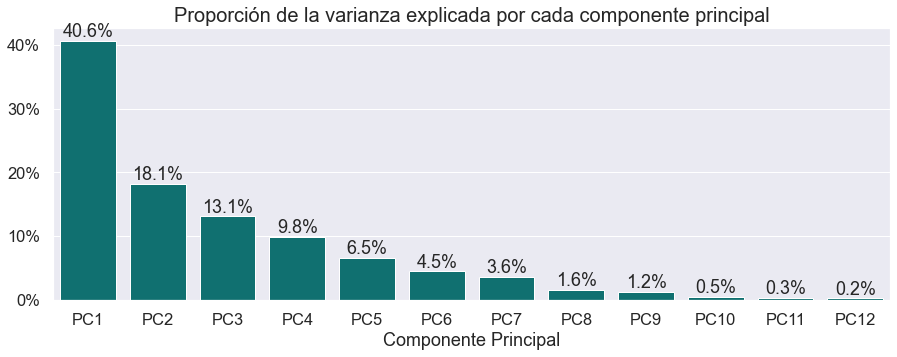

In [21]:
df_pca_graf = df_pca.copy()
df_pca_graf["Proporción de la varianza explicada"] = df_pca_graf["Proporción de la varianza explicada"]*100

plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)

ax=sns.barplot(x="Componente Principal",y="Proporción de la varianza explicada",data=df_pca_graf,color="teal")

plt.title('Proporción de la varianza explicada por cada componente principal', fontsize=20)
#plt.xlabel(None)
plt.ylabel(None)

plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.bar_label(ax.containers[0],fmt='%2.1f%%')


plt.savefig("../Output/Gráficas/Proporcion_varianza.jpg",bbox_inches='tight')
plt.show()

Creando el DataFrame con la serie de tiempo de los componentes principales

In [22]:
df_PC = pd.DataFrame(pc,columns=["PC"+str(i) for i in range(1,len(pca.components_)+1)])
df_PC.set_index(df_Inflacion_divisiones.index,inplace=True)

df_PC.to_excel("../Output/Tablas/Componentes_Principales.xlsx")
df_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Fecha,,,,,,,,,,,,
2011-12-31,3.306031,0.559835,0.528302,-0.632018,2.982461,0.595839,1.548862,0.054917,0.573812,0.203366,-0.143730,0.065795
2012-01-31,3.136686,0.528449,0.639771,-0.080469,2.702101,0.551661,1.182217,0.347195,0.468928,0.099790,-0.271129,-0.212100
2012-02-29,3.144370,0.891411,0.579724,0.051135,2.903376,0.350212,0.615598,0.584068,0.212650,-0.025384,-0.201043,-0.151345
2012-03-31,3.080041,0.581409,0.761432,0.526239,2.891992,0.400525,0.133550,0.711899,0.358063,-0.212538,-0.225573,-0.229210
2012-04-30,3.553966,0.502069,1.233707,0.587433,1.937234,-0.312775,-0.109647,0.167838,0.043453,0.379498,-0.249108,-0.259538
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.233145,2.204556,1.884686,0.499520,-1.912087,-0.290450,0.478203,0.867704,0.000195,0.076165,0.326190,-0.387927
2022-03-31,1.099868,2.623537,2.132811,0.364817,-1.502132,0.538095,0.905621,0.845674,0.038627,-0.028999,0.255648,-0.194497
2022-04-30,2.102330,2.667315,2.754494,0.488122,-1.365858,0.439663,0.686207,0.243314,-0.130266,0.174924,0.478905,0.029594


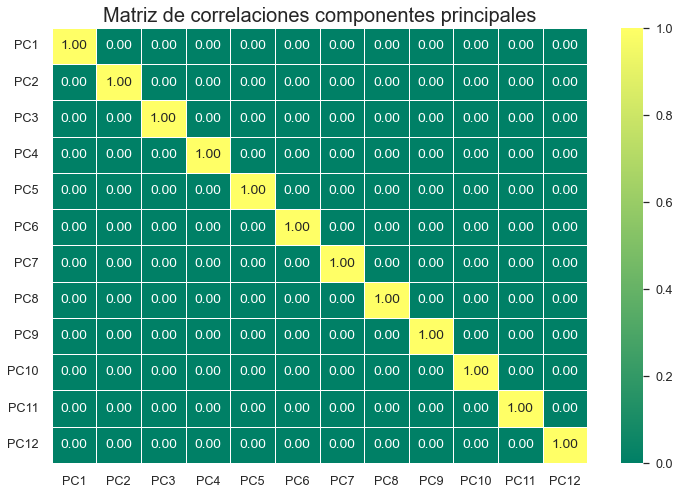

In [23]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.15)
sns.heatmap(df_PC.corr(method="pearson").abs(), annot=True, fmt=".2f", linewidths=.5,cmap="summer")#, cmap="gist_heat")
plt.title('Matriz de correlaciones componentes principales', fontsize=20)
plt.yticks(rotation="horizontal")


df_PC.corr().to_excel("../Output/Tablas/Matriz_Correlaciones_Componentes.xlsx")
plt.savefig("../Output/Gráficas/Matriz_Correlaciones_Componentes.jpg",bbox_inches='tight')

plt.show()

El factor común Ft, se obtiene con este PCA

$ F_t = PC_{escalado}$

Es necesario escalar el componente principal de nuevo porque este se encuentra normalizado, esto se hará con la desviación estándar y media de la variación interanual del nivel general de precios a nivel república

Por lo que, para obtener un estimado de la inflación de cada componente del CPI:

$\pi_{i,t}=\Lambda_i F_t + \epsilon_{i,t}$

In [24]:
df_Ft = pd.DataFrame()

df_Ft = df_PC.apply(lambda x: x*float(df_Inflacion.std()) + float(df_Inflacion.mean()))

df_Ft.to_excel("../Output/Tablas/Matriz_Ft.xlsx")
df_Ft

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Fecha,,,,,,,,,,,,
2011-12-31,0.074342,0.044490,0.044148,0.031535,0.070825,0.044882,0.055241,0.039002,0.044642,0.040615,0.036842,0.039120
2012-01-31,0.072501,0.044149,0.045359,0.037530,0.067777,0.044402,0.051256,0.042179,0.043502,0.039490,0.035458,0.036099
2012-02-29,0.072585,0.048095,0.044707,0.038961,0.069965,0.042212,0.045097,0.044754,0.040716,0.038129,0.036219,0.036760
2012-03-31,0.071886,0.044725,0.046682,0.044125,0.069841,0.042759,0.039857,0.046143,0.042297,0.036095,0.035953,0.035913
2012-04-30,0.077037,0.043862,0.051816,0.044790,0.059463,0.035005,0.037213,0.040229,0.038877,0.042530,0.035697,0.035584
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.040939,0.062369,0.058892,0.043835,0.017620,0.035248,0.043603,0.047837,0.038407,0.039233,0.041951,0.034188
2022-03-31,0.050361,0.066923,0.061589,0.042371,0.022076,0.044254,0.048249,0.047598,0.038825,0.038090,0.041184,0.036291
2022-04-30,0.061258,0.067399,0.068347,0.043711,0.023558,0.043184,0.045864,0.041050,0.036989,0.040306,0.043611,0.038727


## Mostrando regresiones con todos los componentes

In [25]:
df_Estimaciones_Componentes = df_Inflacion.copy()

# Crear objeto de regresión lineal
slr = LinearRegression()

# Realizar regresión lineal con cada vez más componentes principales
for i in range(len(df_Ft.columns)):
    df_tmp = df_Ft.iloc[:, :i + 1]
    x_reg = df_tmp.values
    y_reg = df_Inflacion.values.reshape(-1, 1)
    
    df_estimacion = pd.DataFrame(slr.fit(x_reg, y_reg).predict(x_reg), columns=[f"PC 1-{i + 1}"])
    df_estimacion["Fecha"] = df_Inflacion.index
    df_estimacion.set_index("Fecha", inplace=True)
    
    df_Estimaciones_Componentes = pd.concat([df_Estimaciones_Componentes, df_estimacion], axis=1)

df_Estimaciones_Componentes.to_excel("../Output/Tablas/Estimaciones_Con_Todos_Los_Componentes.xlsx")
df_Estimaciones_Componentes

,Inflación Total,PC 1-1,PC 1-2,PC 1-3,PC 1-4,PC 1-5,PC 1-6,PC 1-7,PC 1-8,PC 1-9,PC 1-10,PC 1-11,PC 1-12
Fecha,,,,,,,,,,,,,
2011-12-31,0.062000,0.041810,0.042805,0.043143,0.047349,0.058212,0.062684,0.067119,0.066866,0.065215,0.065528,0.065075,0.065204
2012-01-31,0.054982,0.041636,0.042575,0.042984,0.043520,0.053362,0.057502,0.060887,0.059288,0.057939,0.058092,0.057239,0.056823
2012-02-29,0.052201,0.041643,0.043228,0.043599,0.043259,0.053834,0.056462,0.058225,0.055535,0.054924,0.054885,0.054252,0.053955
2012-03-31,0.046577,0.041577,0.042611,0.043098,0.039596,0.050130,0.053135,0.053518,0.050240,0.049210,0.048883,0.048172,0.047723
2012-04-30,0.042745,0.042065,0.042958,0.043747,0.039838,0.046894,0.044547,0.044233,0.043460,0.043335,0.043919,0.043134,0.042625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.029798,0.038645,0.042565,0.043770,0.040446,0.033481,0.031302,0.032671,0.028676,0.028675,0.028792,0.029819,0.029059
2022-03-31,0.041711,0.039538,0.044203,0.045566,0.043139,0.037667,0.041705,0.044298,0.040404,0.040293,0.040249,0.041054,0.040672
2022-04-30,0.046200,0.040570,0.045313,0.047074,0.043826,0.038851,0.042150,0.044115,0.042995,0.043369,0.043638,0.045146,0.045205


C:\Users\Juan_Manuel\AppData\Local\Temp\ipykernel_13548\2831184303.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm, ax=ax)


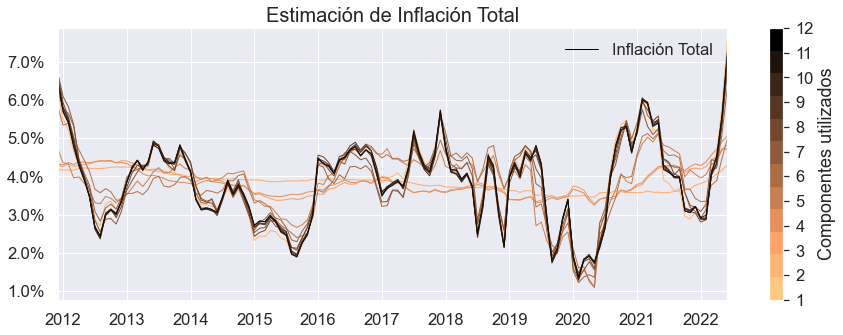

In [26]:
# Configuraciones de la gráfica
sns.set(font_scale=1.5)
colors = sns.color_palette("copper_r", n_colors=len(df_Estimaciones_Componentes.columns))

# Crear la gráfica de líneas
fig, ax = plt.subplots(figsize=(15, 5))
df_Estimaciones_Componentes.plot(legend=False, ax=ax, color=colors, linewidth=1)

# Configurar título y etiquetas
plt.title('Estimación de Inflación Total', fontsize=20)
plt.xlabel(None)
#plt.xlabel('Fecha')
#plt.ylabel('Estimación')

# Configurar código de colores con barra de color (cbar) a la derecha del gráfico
cmap = plt.cm.get_cmap("copper_r", 12)  # Escala de color con 12 tonos
norm = plt.Normalize(1, 12)  # Normalizar los valores de 1 a 12
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Establecer un arreglo vacío
cbar = plt.colorbar(sm, ax=ax)

# Configurar los límites y etiquetas de la barra de color
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(range(1, 13))

cbar.set_label('Componentes utilizados')

# Quitar nombres de las líneas (leyendas) excepto el de la primera
ax.legend([df_Estimaciones_Componentes.columns[0]], loc='upper right')
leg = ax.get_legend()
leg.legendHandles[0].set_color("black")
# Formatear el eje y como porcentaje
plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1, decimals=1))

# Mostrar la gráfica
plt.show()

# Regresión directa con la serie de la inflación
$\tilde{\pi}_{t}=\Lambda  F_t +\alpha$

In [27]:
df_Subyacente_BANGUAT.loc[df_Inflacion.index]

,Inflación Subyacente publicada por el Banco de Guatemala
Fecha,
2011-12-31,0.0527
2012-01-31,0.0464
2012-02-29,0.0440
2012-03-31,0.0425
2012-04-30,0.0411
...,...
2022-02-28,0.0337
2022-03-31,0.0347
2022-04-30,0.0371


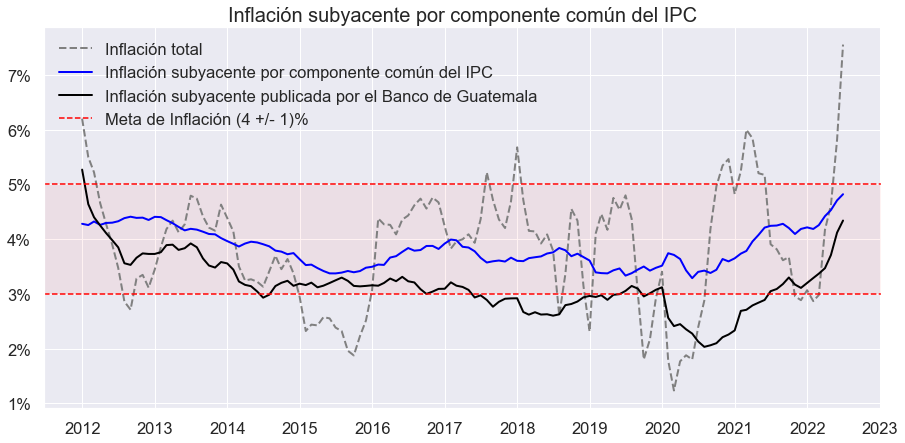

In [28]:
slr=LinearRegression()

y_reg=df_Inflacion.values.reshape(-1,1)
x_reg = df_Ft.iloc[:,0:2].values

df_estimacion = pd.DataFrame(slr.fit(x_reg,y_reg).predict(x_reg))
df_estimacion["Fecha"]=df_Inflacion.index
df_estimacion.set_index("Fecha",inplace=True)

plt.figure(figsize=(15, 7))
sns.set(font_scale=1.5)

plt.title('Inflación subyacente por componente común del IPC', fontsize=20)

plt.plot(df_Inflacion, color="grey", linestyle="--",linewidth=2) #Original
plt.plot(df_estimacion, color="blue",linewidth=2) #Alpha low
plt.plot(df_Subyacente_BANGUAT.loc[df_Inflacion.index], color="black",linewidth=2) #Banguat

plt.axhline(y=0.03, color='red', linestyle='--')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axhspan(0.03, 0.05, facecolor='red', alpha=0.05)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.legend(["Inflación total","Inflación subyacente por componente común del IPC","Inflación subyacente publicada por el Banco de Guatemala","Meta de Inflación (4 +/- 1)%"],loc="upper left")
plt.savefig("../Output/Gráficas/Comparación_Subyacentes.jpg",bbox_inches='tight')

plt.show()

## Expandiendo muestra mes a mes para ver si la medida varía mucho

C:\Users\Juan_Manuel\AppData\Local\Temp\ipykernel_13548\876652480.py:59: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=plt.colorbar(sm)
C:\Users\Juan_Manuel\AppData\Local\Temp\ipykernel_13548\876652480.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))


<Figure size 1008x504 with 0 Axes>

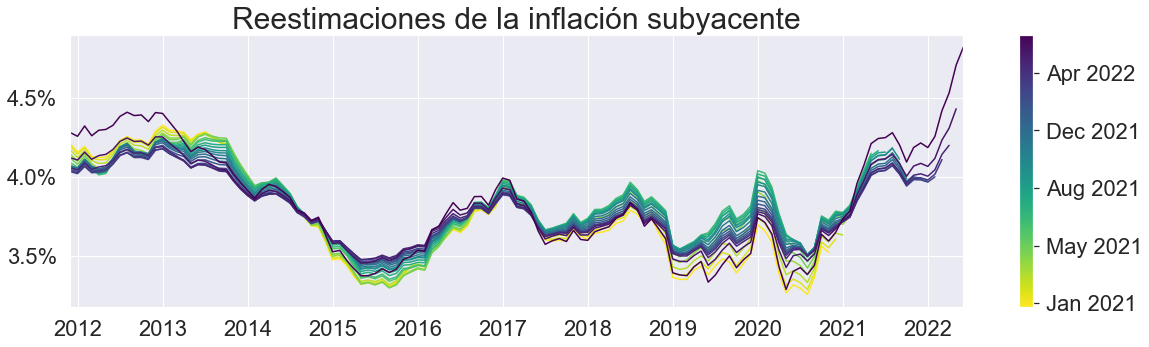

In [29]:
y = df_Inflacion.copy()
x = df_Inflacion_divisiones.copy()

start = 108
lista=[i for i in range(start,len(y)+1)]


diferencias_promedio = []
diferencias_max = []

df_curvas=y.copy()

#plt.figure(figsize=(10, 5))
#plt.plot(y, marker='o', color="b") #Original
#plt.plot(df_subyacente_banguat, marker='o', color="grey") #Banguat

#i=12
for i in lista:    

    x_norm = StandardScaler().fit_transform(x.iloc[:i,:])
    
    pca = decomposition.PCA(n_components=2) 
    pc=pca.fit_transform(x_norm)
    df_pc = pd.DataFrame(pc,columns=["PC"+str(i) for i in range(1,len(pca.components_)+1)])
    
    
    df_Ft_2 = df_pc.apply(lambda xd: xd*float(y[:i].std())+float(y[:i].mean()))   
    df_Ft_2["Fecha"]=y[:i].index
    df_Ft_2.set_index("Fecha",inplace=True)

    
    x_reg = df_Ft_2.values
    y_reg=y[:i].values.reshape(-1,1)


    df_estimacion_dir = pd.DataFrame(slr.fit(x_reg,y_reg).predict(x_reg))
    df_estimacion_dir["Fecha"]=df_Ft_2.index
    df_estimacion_dir.set_index("Fecha",inplace=True)

    diferencias_promedio.append((df_estimacion_dir - df_estimacion.iloc[:i,:]).apply(np.abs).values.mean())
    diferencias_max.append((df_estimacion_dir - df_estimacion.iloc[:i,:]).apply(np.abs).values.max())
    
    df_curvas["Curv"+str(i)]=df_estimacion_dir



df_curvas=df_curvas.drop(["Inflación Total"],axis=1)



plt.figure(figsize=(14, 7))


sns.set(font_scale=2)

sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=df_curvas.index[start].value, vmax=df_curvas.index.max().value))
sm._A=[]
plot = df_curvas.plot(legend=False,cmap="viridis_r", figsize=(20, 5),xlabel="")
cbar=plt.colorbar(sm)
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))
plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1,decimals=1))
plt.title('Reestimaciones de la inflación subyacente', fontsize=30)

fig = plot.get_figure()



fig.savefig("../Output/Gráficas/Evolución_ComponenteIPC.jpg",bbox_inches='tight')
df_curvas.to_excel("../Output/Gráficas/Evolución_ComponenteIPC.xlsx")


## Busquemos cual es el punto más alejado entre todas las estimaciones

In [30]:
dif_max = np.array(diferencias_max).max()
dif_max

0.00349213543921717

In [31]:
posicion_dif_max =  diferencias_max.index(dif_max)
posicion_dif_max

6

In [32]:
df_Inflacion.iloc[start+posicion_dif_max]

Inflación Total    0.039072
Name: 2021-06-30 00:00:00, dtype: float64

C:\Users\Juan_Manuel\AppData\Local\Temp\ipykernel_13548\1338818412.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co" (-> color='c'). The keyword argument will take precedence.
  plt.plot(pd.to_datetime('2020-06-01'), 0.0329, "co", color ="blue" ,markersize=15)
C:\Users\Juan_Manuel\AppData\Local\Temp\ipykernel_13548\1338818412.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co" (-> color='c'). The keyword argument will take precedence.
  plt.plot(pd.to_datetime('2020-06-01'), 0.0363, "co", color ="blue" ,markersize=15)


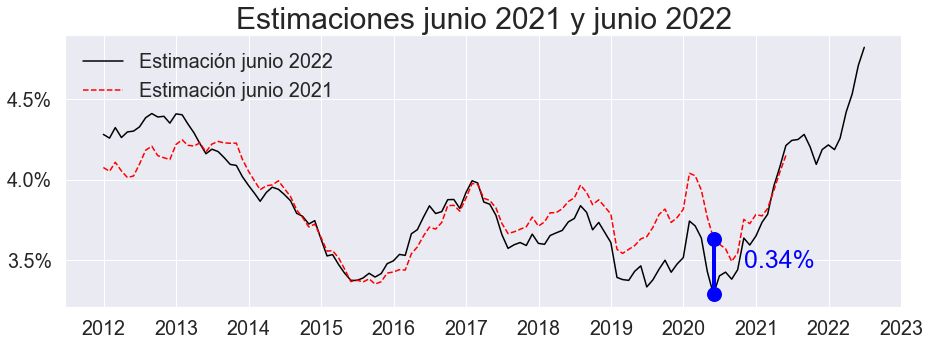

In [33]:
from datetime import datetime

plt.figure(figsize=(15, 5))
sns.set(font_scale=1.8)


plt.plot(df_estimacion.iloc[:,:], color="black") #Alpha low
plt.plot(df_curvas.iloc[:,posicion_dif_max], color="red", linestyle='--') #Alpha low


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gcf().autofmt_xdate()
plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1,decimals=1))

plt.vlines(pd.to_datetime('2020-06-01'), 0.0329, 0.0363, color='blue', linewidth=4)#,ymin=0.07,ymax=0.39)
plt.plot(pd.to_datetime('2020-06-01'), 0.0329, "co", color ="blue" ,markersize=15)
plt.plot(pd.to_datetime('2020-06-01'), 0.0363, "co", color ="blue" ,markersize=15)

#plt.axvline(pd.to_datetime('2020-05-01'), color='blue')#,ymin=0.07,ymax=0.39)

plt.legend(["Estimación junio 2022","Estimación junio 2021"],loc="upper left")
plt.text(pd.to_datetime('2020-11-01'), 0.0345, "0.34%",color="blue", fontsize=25)
plt.xticks(rotation="horizontal")
#plt.gcf().autofmt_xdate()
plt.title('Estimaciones junio 2021 y junio 2022', fontsize=30)

plt.savefig("../Output/Gráficas/sub 06-2021 y 06-2022.jpg",bbox_inches='tight')


plt.show()

# Gráficos de choques de oferta

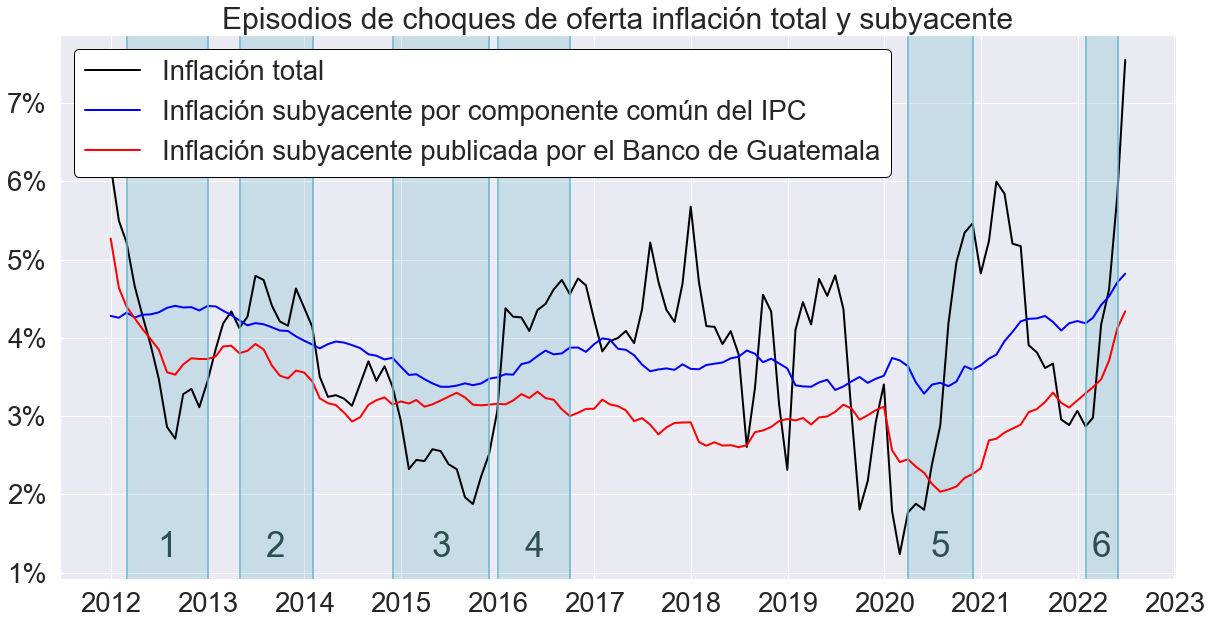

In [34]:
slr=LinearRegression()

#df_Ft = df_pc.multiply(y.std(),axis="columns").add(y.mean(),axis="columns")

y_reg=y.values.reshape(-1,1)
x_reg = df_Ft.iloc[:,0:2].values

df_estimacion = pd.DataFrame(slr.fit(x_reg,y_reg).predict(x_reg))
df_estimacion["Fecha"]=y.index
df_estimacion.set_index("Fecha",inplace=True)

plt.figure(figsize=(20, 10))
sns.set(font_scale=2.5)

plt.plot(y, color="black",linewidth=2)#, linestyle="--") #Original
plt.plot(df_estimacion, color="blue",linewidth=2) #Alpha low
plt.plot(df_Subyacente_BANGUAT.loc[df_Inflacion.index], color="red",linewidth=2) #Banguat


#plt.axhline(y=0.03, color='red', linestyle='--')
#plt.axhline(y=0.05, color='red', linestyle='--')
#plt.axhspan(0.03, 0.05, facecolor='red', alpha=0.05)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

#plt.axvline(pd.to_datetime('2019-01-01'), color='grey')#,ymin=0.07,ymax=0.39)
#plt.axvline(pd.to_datetime('2020-05-01'), color='grey')
#plt.axvspan(pd.to_datetime('2019-01-01'), pd.to_datetime('2020-05-01'), facecolor='grey', alpha=0.25)


parejas_fecha = [['2012-03-01','2013-01-01'],['2013-05-01','2014-02-01'],['2014-12-01','2015-12-01'],['2016-01-01','2016-10-01'],['2020-04-01','2020-12-01'],['2022-02-01','2022-06-01']]

def fecha_media(lista):
    mean = (np.array(lista, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))
    return mean
numero_pareja=0
for fechas in parejas_fecha:
    numero_pareja+=1
    plt.axvline(pd.to_datetime(fechas[0]), color='c')#,ymin=0.07,ymax=0.39)
    plt.axvline(pd.to_datetime(fechas[1]), color='c')
    plt.axvspan(pd.to_datetime(fechas[0]), pd.to_datetime(fechas[1]), facecolor='c', alpha=0.25)
    plt.text(pd.to_datetime(fecha_media(fechas)), 0.012, str(numero_pareja),color="darkslategrey", fontsize=35,horizontalalignment='center')

plt.title('Episodios de choques de oferta inflación total y subyacente', fontsize=30)
plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.legend(["Inflación total","Inflación subyacente por componente común del IPC","Inflación subyacente publicada por el Banco de Guatemala"],loc="upper left",frameon=True, facecolor="white", edgecolor="black", framealpha=1)
plt.savefig("../Output/Gráficas/Choques.jpg", bbox_inches='tight')

plt.show()

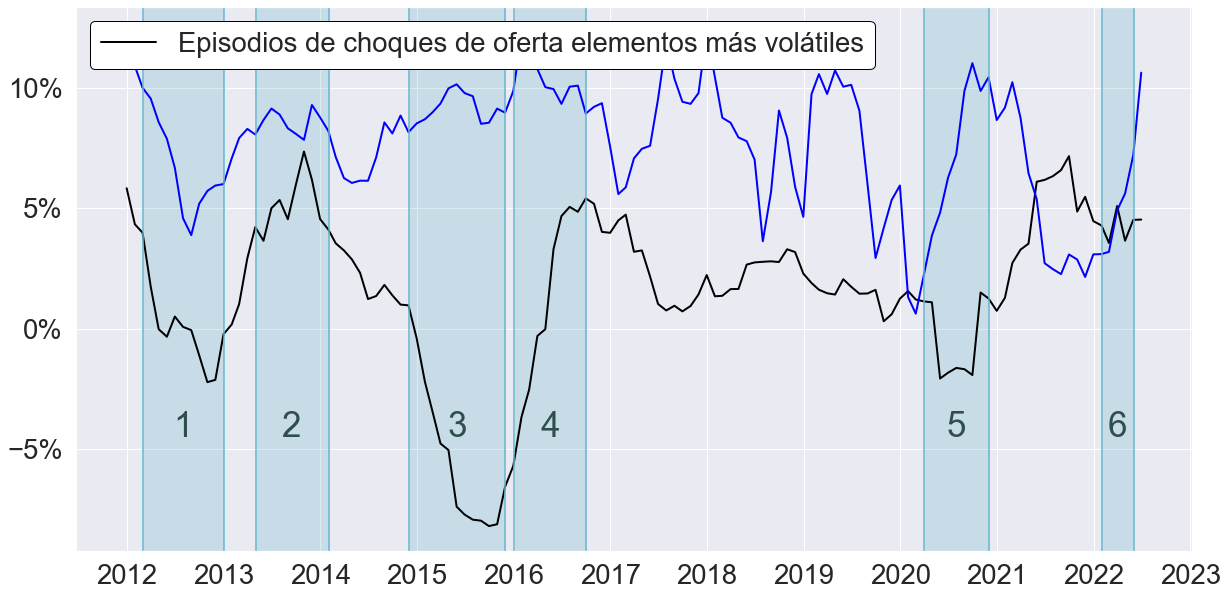

In [35]:
x.columns = [i+1 for i in range(0,12)]

orden_volatilidad = list(x.std().sort_values().index)
orden_volatilidad = orden_volatilidad[::-1]


orden_volatilidad_int = [int(i) for i in orden_volatilidad]
nombres_orden=list(df_Codigos.loc[orden_volatilidad_int]["Descripción"].values)

plt.figure(figsize=(20, 10))
sns.set(font_scale=2.5)

plt.plot(x[orden_volatilidad[1]], color="black",linewidth=2)#, linestyle="--") #Original
plt.plot(x[orden_volatilidad[2]], color="blue",linewidth=2) #Alpha low
#plt.plot(df_subyacente_banguat, color="red",linewidth=2) #Banguat


#plt.axhline(y=0.03, color='red', linestyle='--')
#plt.axhline(y=0.05, color='red', linestyle='--')
#plt.axhspan(0.03, 0.05, facecolor='red', alpha=0.05)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

#plt.axvline(pd.to_datetime('2019-01-01'), color='grey')#,ymin=0.07,ymax=0.39)
#plt.axvline(pd.to_datetime('2020-05-01'), color='grey')
#plt.axvspan(pd.to_datetime('2019-01-01'), pd.to_datetime('2020-05-01'), facecolor='grey', alpha=0.25)


parejas_fecha = [['2012-03-01','2013-01-01'],['2013-05-01','2014-02-01'],['2014-12-01','2015-12-01'],['2016-01-01','2016-10-01'],['2020-04-01','2020-12-01'],['2022-02-01','2022-06-01']]
numero_pareja=0
for fechas in parejas_fecha:
    numero_pareja+=1
    plt.axvline(pd.to_datetime(fechas[0]), color='c')#,ymin=0.07,ymax=0.39)
    plt.axvline(pd.to_datetime(fechas[1]), color='c')
    plt.axvspan(pd.to_datetime(fechas[0]), pd.to_datetime(fechas[1]), facecolor='c', alpha=0.25)
    plt.text(pd.to_datetime(fecha_media(fechas)), -0.045, str(numero_pareja),color="darkslategrey", fontsize=35,horizontalalignment='center')


plt.legend(["Vivienda, agua, electricidad, gas y otros combustibles","Alimentos y bebidas no alcoholicas"],fontsize=24,loc="lower right",frameon=True, facecolor="white", edgecolor="black", framealpha=1)


plt.gca().get_yaxis().set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.legend(["Episodios de choques de oferta elementos más volátiles"],loc="upper left",frameon=True, facecolor="white", edgecolor="black", framealpha=1)


plt.savefig("../Output/Gráficas/choques_petroleo_alimentos.jpg",bbox_inches='tight')

plt.show()

## Comparación brecha del producto
PIB descargado de [World Economic Outlook del IMF](https://www.imf.org/en/Publications/SPROLLS/world-economic-outlook-databases#sort=%40imfdate%20descending)

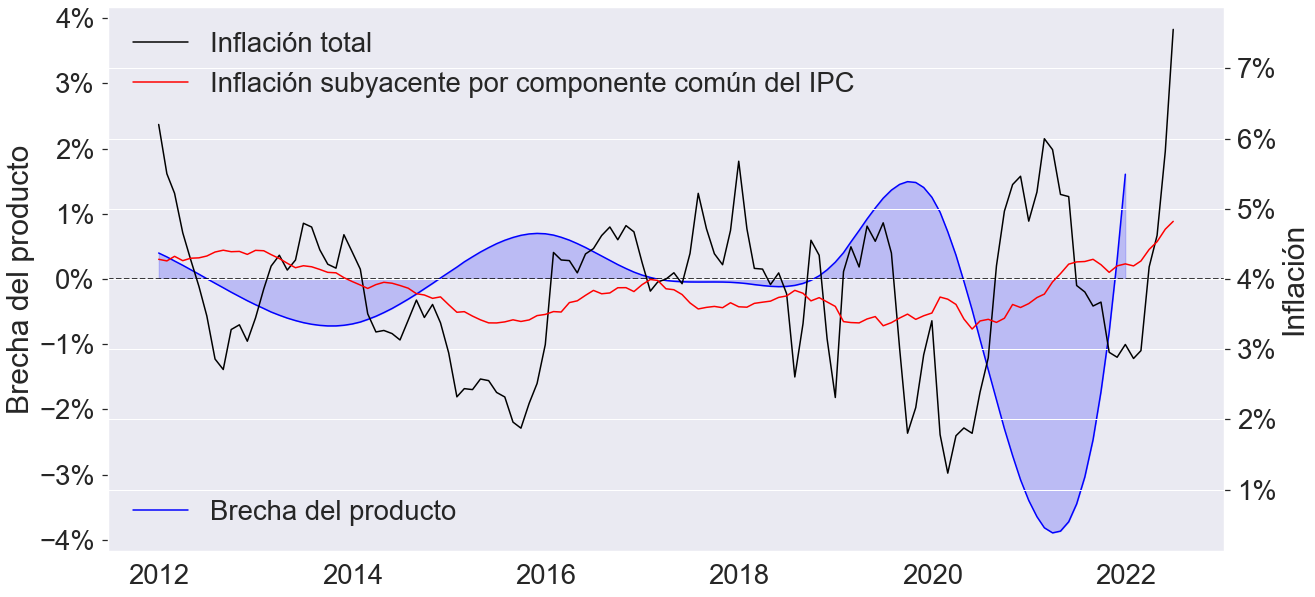

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df_PIB_IMF=pd.read_excel("../SRC/IMF/PIB IMF CONSTANT PRICES2.xlsx")
df_PIB_IMF["Fecha"]= pd.PeriodIndex(df_PIB_IMF["Fecha"], freq='A').to_timestamp() + pd.offsets.YearEnd(0)
df_PIB_IMF.set_index("Fecha", inplace=True)

#ESCOGIENDO LOS DATOS PARA HACER LA REGRESIÓN POLINOMIAL
df_PIB = df_PIB_IMF.loc["2011-12-31":"2021-12-31"].copy()
Meses = (df_PIB_Gf.shape[0]-1)*12+1


#REALIZANDO LA REGRESIÓN POLINOMIAL
x_reg = np.array([i+1 for i in range(len(df_PIB))]).reshape(-1,1)
y_reg = df_PIB["PIB"].values.reshape(-1,1)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_reg.reshape(-1, 1))
y_predict = slr.fit(poly_features, y_reg).predict(poly_features)

#OBTENIENDO LA BRECHA DEL PRODUCTO 
df_PIB["PIB_pot"]=y_predict
df_PIB["Brecha"]=df_PIB["PIB"]-df_PIB["PIB_pot"]
df_PIB["Brecha_porcentual"]=df_PIB["Brecha"]/df_PIB["PIB"]

#DELIMITANDO LOS DATOS A USAR PARA GRÁFICAR
fecha_inicio = str(df_PIB.index.min()+pd.offsets.YearEnd(0))
fecha_fin = str(df_PIB.index.max())


df_PIB_Gf =df_PIB.loc[fecha_inicio:fecha_fin]

#INTERPOLACIÓN DE LOS DATOS QUE SE GRAFICARAN
from scipy.interpolate import interp1d
x_interpol= np.array([i+1 for i in range(0,len(df_PIB_Gf))])

cubic_interploation_model = interp1d(x_interpol, df_PIB_Gf["Brecha_porcentual"], kind = "cubic")

X_=np.linspace(x_interpol.min(), x_interpol.max(), Meses)

Y_=cubic_interploation_model(X_)

df_PIB_suav = pd.DataFrame({"X":X_,"PIB_PORC":Y_})

fecha_inicio = df_estimacion.index.min() +pd.offsets.MonthEnd(-1)
fecha_fin = str(df_PIB.index.max()) 

df_fecha=pd.DataFrame()
df_fecha["Fecha"]=pd.date_range(start=fecha_inicio, end=fecha_fin,freq="MS")+pd.offsets.MonthEnd(0)
df_fecha = df_fecha.set_index("Fecha")

df_PIB_suav["Fecha"] = df_fecha.index
df_PIB_suav = df_PIB_suav.set_index("Fecha")

#GRAFICANDO LA BRECHA DEL PRODUCTO SUAVIZADA JUNTO INFLACION TOTAL Y SUBYACENTE
sns.set(font_scale=2.5)
fig, ax1 = plt.subplots(figsize=(20, 10))

ax2 = ax1.twinx()

ax1.plot(df_PIB_suav["PIB_PORC"], color='blue')
ax1.axhline(y=0, color='black', linestyle='--')
ax1.fill_between(df_PIB_suav.index, 0, df_PIB_suav["PIB_PORC"], color='blue', alpha=0.2)

ax2.plot(y, color='black')
ax2.plot(df_estimacion, color='red')

yabs1_max = abs(max(ax1.get_ylim(), key=abs))
ax1.set_ylim(ymin=-yabs1_max, ymax=yabs1_max)

yabs2_max = abs(max(ax2.get_ylim(), key=abs))
ax2.set_ylim(ymin=0.08-yabs2_max, ymax=yabs2_max)
#ax2.grid(False)
ax1.grid(False)
#ax2.grid(True)



ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax1.set_ylabel("Brecha del producto")
ax2.set_ylabel("Inflación")


ax1.legend(["Brecha del producto"],loc="lower left")
ax2.legend(["Inflación total","Inflación subyacente por componente común del IPC"],loc="upper left")
plt.show()

fig.savefig("../Output/Gráficas/graf_brecha.jpg",bbox_inches='tight')


### Guardando las ponderaciones de las divisiones en el IPC y los primeros dos autovectores que dan lugar a los componentes principales utilizads

In [ ]:
df_Ponderacion = pd.read_excel("../SRC/IPC-INE/Ponderaciones IPC.xlsx")
df_Autovectores = pd.DataFrame(autovectores)
df_Autovectores = abs(df_Autovectores)

df_Ponderacion["V1"] = df_Autovectores[0] / df_Autovectores[0].sum()
df_Ponderacion["V2"] = df_Autovectores[1] / df_Autovectores[1].sum()

#df_Ponderacion["Código"] = df_Ponderacion["Código"].apply(lambda x: int(x))
df_Ponderacion=df_Ponderacion.set_index("Código")

df_Ponderacion.to_excel("../Output/Tablas/Ponderaciones_Componentes.xlsx")

df_Ponderacion

,IPC,V1,V2
Código,,,
1,0.28749,0.036806,0.162497
2,0.00276,0.001106,0.025089
3,0.07406,0.149826,0.019978
4,0.12614,0.001713,0.179260
5,0.05425,0.113445,0.107530
6,0.04223,0.077586,0.049782
7,0.10430,0.032579,0.221968
8,0.05147,0.095916,0.011054
9,0.05620,0.129465,0.002221
